# <center> **Implementación de un modelo de árboles de Decisión para la Clasificación del Cáncer de mama**

# **Planteamiento del Problema**

El cáncer de mama es una de las formas más comunes de cáncer en mujeres en todo el mundo. La detección temprana es crucial para mejorar las tasas de supervivencia. Las técnicas de aprendizaje automático, como los árboles de decisión, pueden ayudar en la clasificación automática de tumores malignos y benignos.

# **Objetivo**
El objetivo principal es desarrollar un modelo de árbol de decisión que pueda predecir si un tumor es maligno o benigno con alta precisión. Este modelo utilizará características como el tamaño del tumor, la textura, la simetría, entre otras, para hacer sus predicciones.

# **Datos**
El conjunto de datos de cáncer de mama de Scikit-learn se utilizará para este propósito. Contiene 569 muestras con 30 características cada una, que se han calculado a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria.

# **Características**

| Nombre de la Variable  | Descripción                                                  | Tipo de Variable |
|------------------------|--------------------------------------------------------------|------------------|
| Radio del tumor        | Media de las distancias desde el centro hasta los puntos del perímetro del tumor | Numérico         |
| Textura                | Desviación estándar de los valores de la escala de grises en la imagen del tumor | Numérico         |
| Perímetro              | Tamaño del perímetro del tumor                               | Numérico         |
| Área                   | Área del tumor                                               | Numérico         |
| Suavidad               | Variación local en longitudes de radio                       | Numérico         |
| Compactación           | Perímetro^2 / área - 1.0                                     | Numérico         |
| Concavidad             | Severidad de las porciones cóncavas del contorno             | Numérico         |
| Puntos cóncavos        | Número de porciones cóncavas en el contorno                  | Numérico         |
| Simetría               | Simetría del tumor                                           | Numérico         |
| Dimensión fractal      | "Aproximación de la costa" - 1                               | Numérico         |
| Etiqueta               | Indica si el tumor es maligno (0) o benigno (1)              | Categórico       |


# **Métricas de Evaluación**
Las métricas clave para evaluar el rendimiento del modelo incluirán:

* **Precisión:** Proporción de predicciones correctas entre el número total de casos.
* **Sensibilidad:** Proporción de verdaderos positivos entre el número total de casos positivos reales.
* **Especificidad:** Proporción de verdaderos negativos entre el número total de casos negativos reales.

# **Entregables**
* Un modelo de árbol de decisión entrenado.
* Un informe que incluya el rendimiento del modelo y la importancia de las características.
* Visualización del árbol de decisión.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [ ]:
target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Convertir la variable objetivo a un DataFrame de Pandas
y_df = pd.DataFrame(y, columns=['Target'])

# Crear una tabla de frecuencia
freq_table = y_df['Target'].value_counts().reset_index()
freq_table.columns = ['Clase', 'Frecuencia']

# Si tienes los nombres de las clases, puedes reemplazar los números por los nombres
# Por ejemplo, en el conjunto de datos de cáncer de mama de sklearn, 0 representa 'maligno' y 1 representa 'benigno'
freq_table['Clase'].replace({0: 'Maligno', 1: 'Benigno'}, inplace=True)

# Mostrar la tabla de frecuencia
print(freq_table)


     Clase  Frecuencia
0  Benigno         357
1  Maligno         212


# **Generamos los Datos de entrenamiento y de Validación**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

In [ ]:
import pandas as pd

# Convertir la variable objetivo a un DataFrame de Pandas
y_df = pd.DataFrame(y_train, columns=['Target'])

# Crear una tabla de frecuencia
freq_table = y_df['Target'].value_counts().reset_index()
freq_table.columns = ['Clase', 'Frecuencia']

# Si tienes los nombres de las clases, puedes reemplazar los números por los nombres
# Por ejemplo, en el conjunto de datos de cáncer de mama de sklearn, 0 representa 'maligno' y 1 representa 'benigno'
freq_table['Clase'].replace({0: 'Maligno', 1: 'Benigno'}, inplace=True)

# Mostrar la tabla de frecuencia
print(freq_table)


     Clase  Frecuencia
0  Benigno         285
1  Maligno         170


# **Creamos el modelo de árbol de decisión**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy'random_state=42)  # Limitamos la profundidad para evitar sobreajuste

# **Entrenamos el modelo**

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# **Realizamos las predicciones del modelo**

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

# **Evaluamos el modelo**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 94.74%
Precisión del modelo: 94.74%


# **Generación del árbol de decisión**

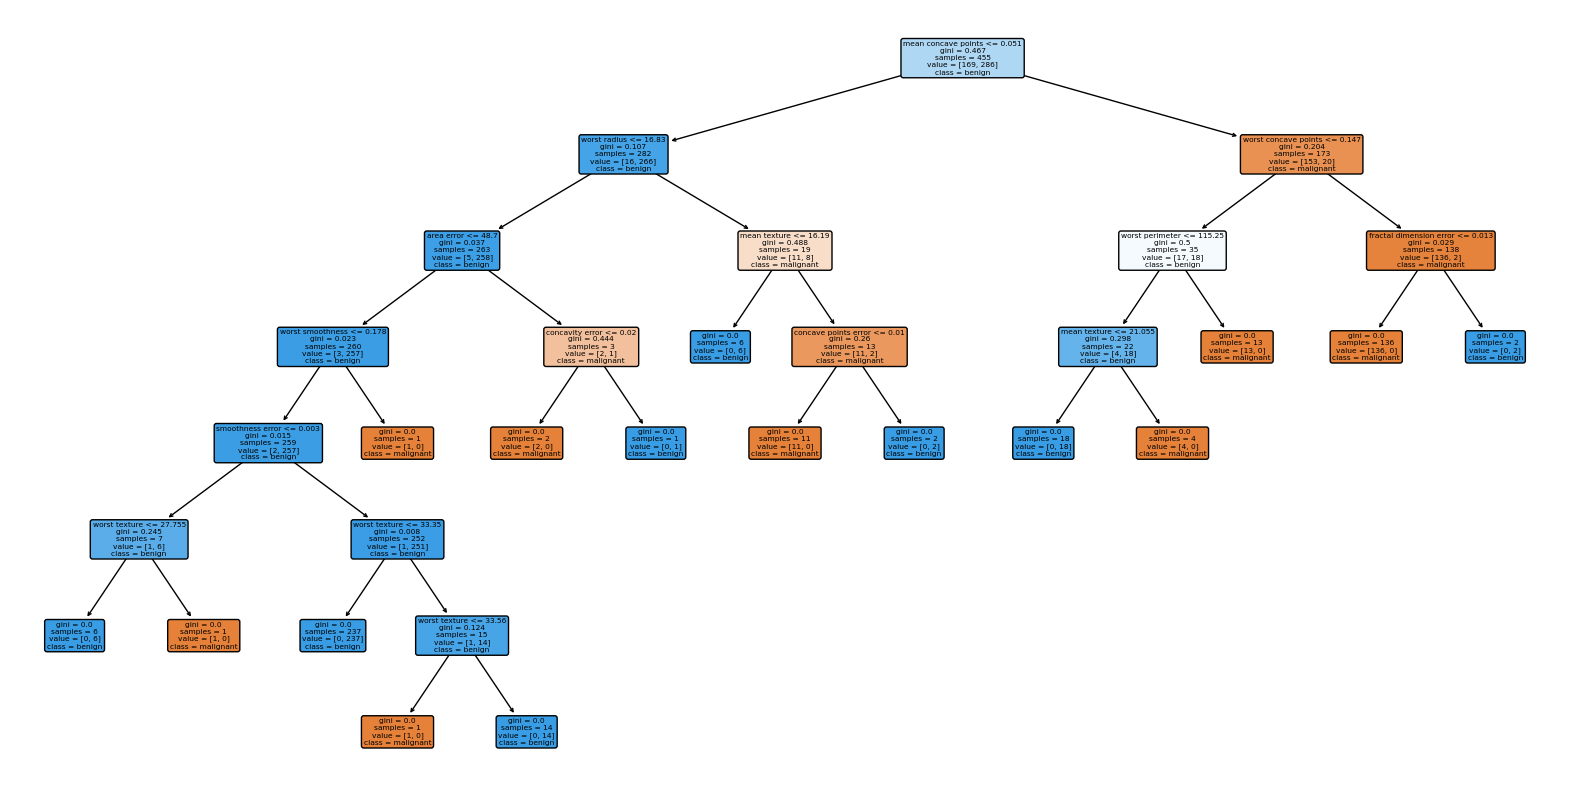

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

# Generamos las regla

In [ ]:
def extract_rules_to_dataframe(tree, feature_names, class_names):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    values = tree.tree_.value

    rules = []
    segments = []

    def recurse(node, rule):
        if children_left[node] != children_right[node]:
            name = feature_names[feature[node]]
            thres = threshold[node]
            recurse(children_left[node], rule + [f"{name} <= {thres:.2f}"])
            recurse(children_right[node], rule + [f"{name} > {thres:.2f}"])
        else:
            class_name = class_names[np.argmax(values[node])]
            rules.append(" AND ".join(rule))
            segments.append(class_name)

    recurse(0, [])
    df = pd.DataFrame({'Rule': rules, 'Segment': segments})
    return df

# Extraer las reglas a un DataFrame
df_rules = extract_rules_to_dataframe(clf, feature_names, data.target_names)

pd.set_option('display.max_rows', None)
df_rules

,Rule,Segment
0,mean concave points <= 0.05 AND worst radius <...,benign
1,mean concave points <= 0.05 AND worst radius <...,malignant
2,mean concave points <= 0.05 AND worst radius <...,benign
3,mean concave points <= 0.05 AND worst radius <...,malignant
4,mean concave points <= 0.05 AND worst radius <...,benign
5,mean concave points <= 0.05 AND worst radius <...,malignant
6,mean concave points <= 0.05 AND worst radius <...,malignant
7,mean concave points <= 0.05 AND worst radius <...,benign
8,mean concave points <= 0.05 AND worst radius >...,benign
9,mean concave points <= 0.05 AND worst radius >...,malignant


In [ ]:
feature_importances = clf.feature_importances_

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
df_importance = df_importance.sort_values('Importance', ascending=False)

# Mostrar la importancia de las características
df_importance

,Feature,Importance
22,worst perimeter,0.829686
21,worst texture,0.081741
27,worst concave points,0.048332
7,mean concave points,0.031653
1,mean texture,0.008588
0,mean radius,0.000000
16,concavity error,0.000000
28,worst symmetry,0.000000
26,worst concavity,0.000000
25,worst compactness,0.000000


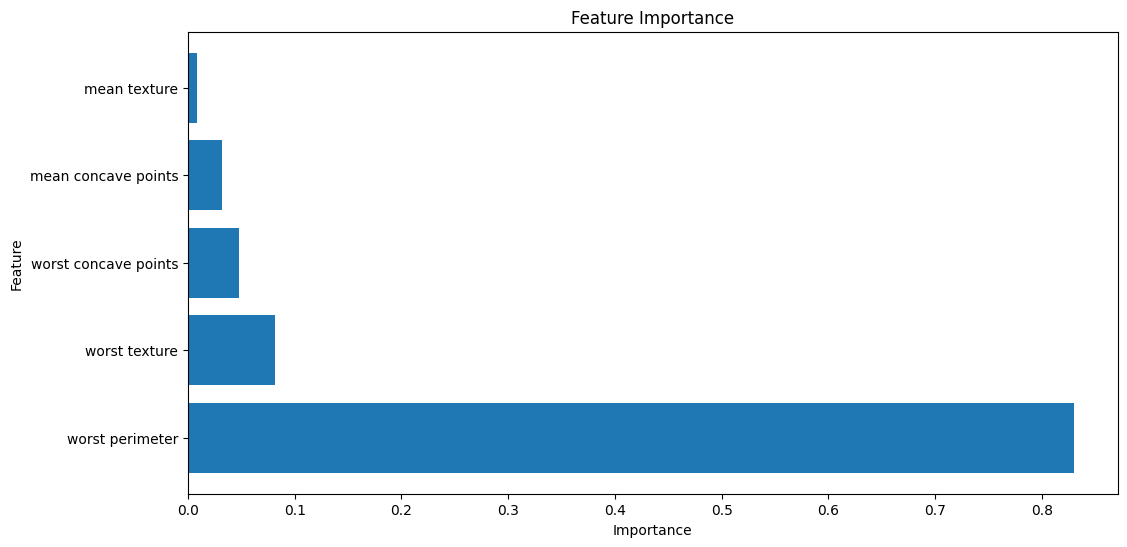

In [ ]:
# Filtrar las características con una importancia mayor que 0.1
df_filtered = df_importance[df_importance['Importance']>0 ]

# Graficar la importancia de las características filtradas
plt.figure(figsize=(12, 6))
plt.barh(df_filtered['Feature'], df_filtered['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **Definimos los mejores parámetros**

In [ ]:
# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Utilizar el mejor modelo para hacer predicciones
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo con los mejores hiperparámetros: {accuracy * 100:.2f}%")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Exactitud del modelo con los mejores hiperparámetros: 94.74%


**criterion: 'gini'**

Este parámetro especifica la función que se utilizará para medir la calidad de una división. Los valores posibles son "gini" para la impureza de Gini y "entropy" para la ganancia de información. En este caso, el valor óptimo es "gini", lo que significa que el algoritmo utilizará la impureza de Gini para evaluar la calidad de las divisiones.

**max_depth: None**

Este parámetro controla la profundidad máxima del árbol. Si se establece en None, los nodos se expanden hasta que contengan menos de min_samples_split muestras o hasta que sean puros (es decir, contengan muestras de una sola clase). En este caso, el valor óptimo es None, lo que significa que no hay un límite preestablecido para la profundidad del árbol.

**min_samples_leaf: 1**

Este parámetro especifica el número mínimo de muestras que debe haber en un nodo hoja. Un nodo se dividirá si, después de la división, cada uno de los nodos hijos contiene al menos min_samples_leaf muestras. En este caso, el valor óptimo es 1, lo que significa que cada nodo hoja debe contener al menos una muestra.

**min_samples_split: 2**

Este parámetro controla el número mínimo de muestras que debe tener un nodo para que se pueda dividir. Si un nodo tiene menos de min_samples_split muestras, no se dividirá y se convertirá en un nodo hoja. En este caso, el valor óptimo es 2, lo que significa que un nodo debe tener al menos dos muestras para que se considere su división.

**splitter: 'best'**

Este parámetro determina la estrategia que se utilizará para elegir la división en cada nodo. Los valores posibles son "best" y "random". Con "best", el algoritmo buscará la mejor división en función del criterio elegido (Gini o entropía, por ejemplo). Con "random", el algoritmo elegirá la mejor división aleatoria entre un subconjunto de características. En este caso, el valor óptimo es "best", lo que significa que el algoritmo buscará la mejor división posible en cada nodo.

In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=0
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 93.86%
Precisión del modelo: 93.90%


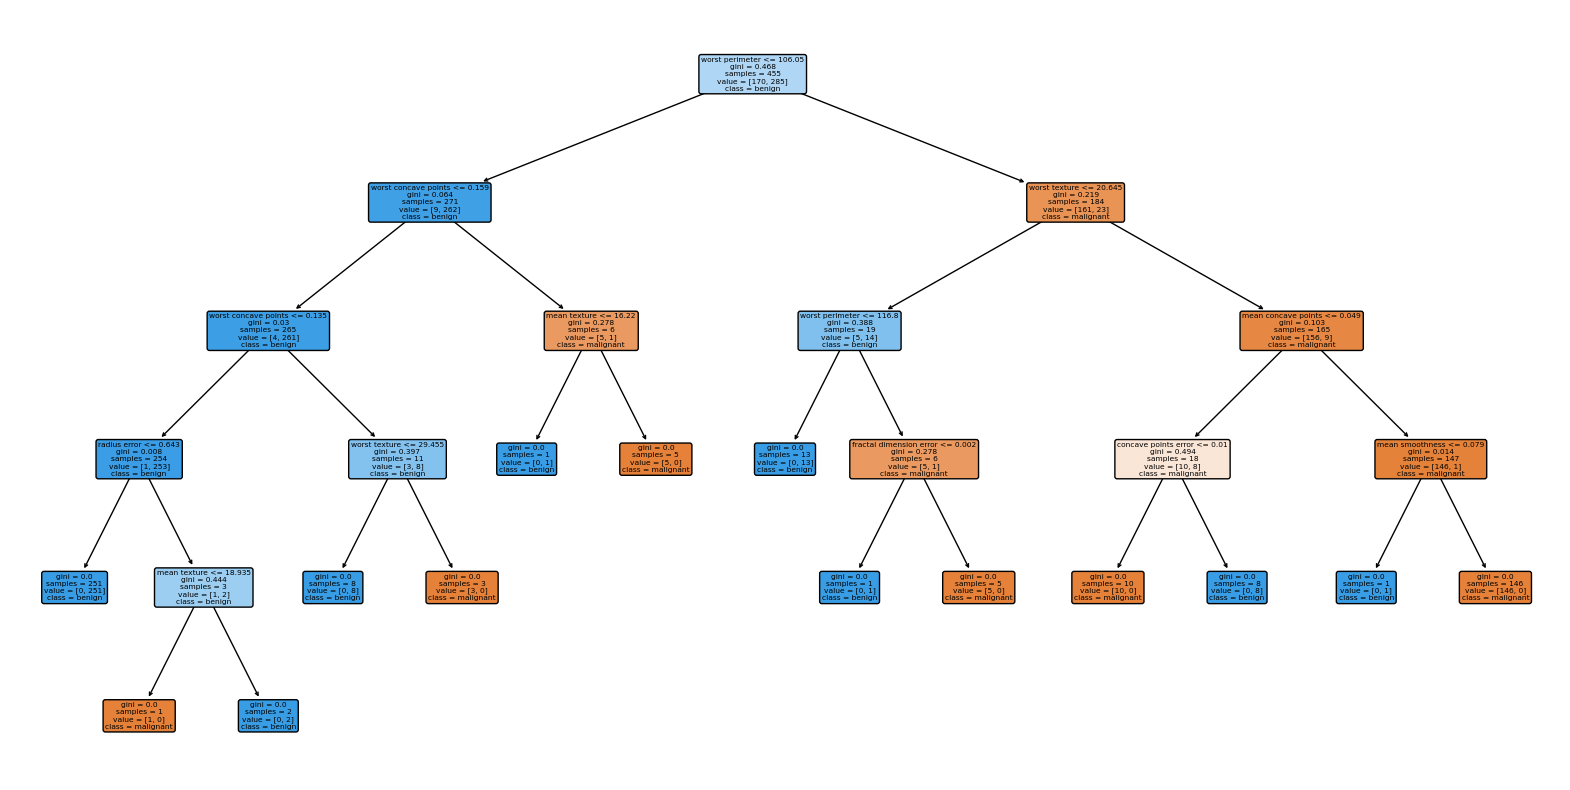

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

In [ ]:
feature_importances = clf.feature_importances_

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
df_importance = df_importance.sort_values('Importance', ascending=False)

# Mostrar la importancia de las características
df_importance

,Feature,Importance
22,worst perimeter,0.756063
21,worst texture,0.094977
27,worst concave points,0.044043
17,concave points error,0.041738
7,mean concave points,0.028844
1,mean texture,0.014087
4,mean smoothness,0.009327
19,fractal dimension error,0.007826
10,radius error,0.003093
0,mean radius,0.000000


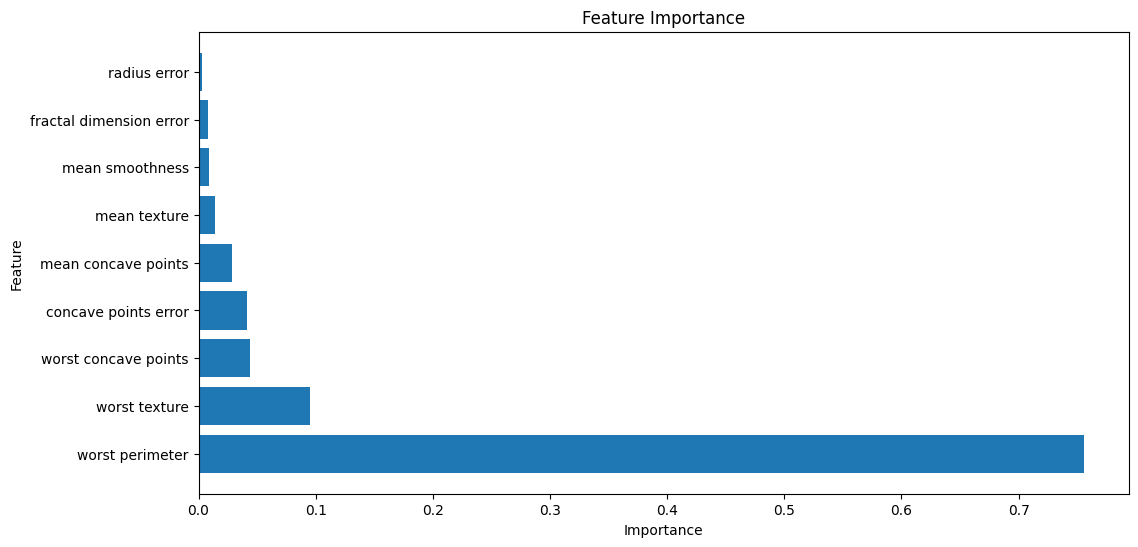

In [ ]:
# Filtrar las características con una importancia mayor que 0.1
df_filtered = df_importance[df_importance['Importance']>0 ]

# Graficar la importancia de las características filtradas
plt.figure(figsize=(12, 6))
plt.barh(df_filtered['Feature'], df_filtered['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **Oversampling**

In [ ]:
    # Aplicar SMOTE
    sm = SMOTE(random_state=1)
    X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
import pandas as pd

# Convertir la variable objetivo a un DataFrame de Pandas
y_df = pd.DataFrame(y_res, columns=['Target'])

# Crear una tabla de frecuencia
freq_table = y_df['Target'].value_counts().reset_index()
freq_table.columns = ['Clase', 'Frecuencia']

# Si tienes los nombres de las clases, puedes reemplazar los números por los nombres
# Por ejemplo, en el conjunto de datos de cáncer de mama de sklearn, 0 representa 'maligno' y 1 representa 'benigno'
freq_table['Clase'].replace({0: 'Maligno', 1: 'Benigno'}, inplace=True)

# Mostrar la tabla de frecuencia
print(freq_table)

     Clase  Frecuencia
0  Maligno         285
1  Benigno         285


In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=0
)
clf.fit(X_res, y_res)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 95.61%
Precisión del modelo: 95.69%


# **Undersampling**

In [ ]:
# Aplicar Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Mostrar el número de instancias en cada clase antes y después del resampling
print("Antes del resampling:")
print(pd.Series(y_train).value_counts())

print("Después del resampling:")
print(pd.Series(y_resampled).value_counts())

Antes del resampling:
1    285
0    170
dtype: int64
Después del resampling:
0    170
1    170
dtype: int64


In [ ]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=0
)
clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 89.47%
Precisión del modelo: 89.47%


# **Método de Validación Cruzada**

## **Definición**
La validación cruzada es una técnica estadística utilizada en el aprendizaje automático y en la estadística para evaluar la habilidad de un modelo para generalizar a datos no vistos. Es especialmente útil cuando se tienen conjuntos de datos limitados.

## **Componentes Teóricos**
* **Conjunto de Datos:** El conjunto de datos se divide en varios subconjuntos. Comúnmente, estos subconjuntos son aleatorios y estratificados (es decir, mantienen la misma proporción de clases que el conjunto de datos original).

* **Folds:** En la validación cruzada de k-folds, el conjunto de datos se divide en k subconjuntos distintos, llamados "folds".

* **Iteraciones:** En cada iteración, k−1 folds se utilizan para entrenar el modelo y el fold restante se utiliza para evaluarlo.

* **Métricas de Evaluación:** En cada iteración, se calculan métricas (como precisión, recall, F1-score, etc.) para evaluar el rendimiento del modelo en el fold de validación.

* **Promedio de Métricas:** Al final de las k iteraciones, se toma el promedio de las métricas de evaluación para obtener una estimación más robusta del rendimiento del modelo.

## **Objetivos**
* **Estimación Robusta:** Al utilizar múltiples subconjuntos para entrenar y probar, se obtiene una estimación más robusta del rendimiento del modelo.

* **Prevención del Sobreajuste**: Al evaluar el modelo en datos no utilizados durante el entrenamiento, se puede detectar y prevenir el sobreajuste.

* **Optimización de Hiperparámetros:** La validación cruzada se puede utilizar para encontrar los hiperparámetros que maximizan la capacidad de generalización del modelo.

* **Comparación de Modelos:** Permite comparar de manera justa el rendimiento de diferentes modelos o algoritmos.

## **Ejemplo Práctico**
Supongamos que se tiene un conjunto de datos con 100 muestras y se desea realizar una validación cruzada de 5-folds. En este escenario:

* Se divide el conjunto de 100 muestras en 5 subconjuntos (folds) de 20 muestras cada uno.
* En la primera iteración, se utilizan los folds 1-4 para entrenar el modelo y el fold 5 para validar.
Se calculan las métricas de evaluación utilizando el fold 5.
* Se repite este proceso para cada uno de los 5 folds, utilizando un fold diferente para la validación en cada iteración.
* Al finalizar las 5 iteraciones, se toma el promedio de las métricas de evaluación para obtener una estimación más robusta del rendimiento del modelo.

# **Aplicación de la técnica de validación cruzada**

## **Cargamos las librerias necesarias para el proyecto**



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

## **Cargamos los datos**

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

## **Inicializamos el clasificador y el sobremuestreo**

In [ ]:
clf = DecisionTreeClassifier()
smote = SMOTE()

* **clf** será el objeto que se encargará de la clasificación.
* **smote** será el objeto que se encargará del sobremuestreo de la clase minoritaria en el conjunto de datos.

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
accuracies = []

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Aplicar SMOTE solo al conjunto de entrenamiento
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Entrenar el modelo
    clf.fit(X_train_resampled, y_train_resampled)

    # Realizar predicciones
    y_pred = clf.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Mostrar la matriz de confusión
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    # Mostrar el reporte de clasificación
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[41  2]
 [ 8 63]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        43
           1       0.97      0.89      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Matriz de Confusión:
[[40  3]
 [ 3 68]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Matriz de Confusión:
[[38  4]
 [ 3 69]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      

In [ ]:
# Calcular la métrica promedio
average_accuracy = np.mean(accuracies)
print(f"La precisión promedio en la validación cruzada es: {average_accuracy}")

La precisión promedio en la validación cruzada es: 0.9296693060083838


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

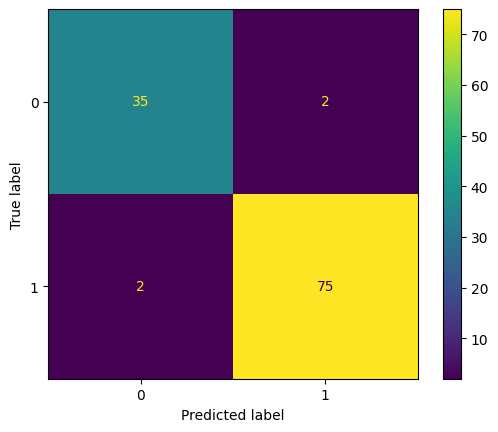

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [ ]:
print('precision', precision_score(y_test, y_pred))

precision 0.974025974025974


In [ ]:
print('Sensibilidad', recall_score(y_test, y_pred))

Sensibilidad 0.974025974025974


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x796f0bcd2320>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x796f0bcd1330>})

In [ ]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 481}


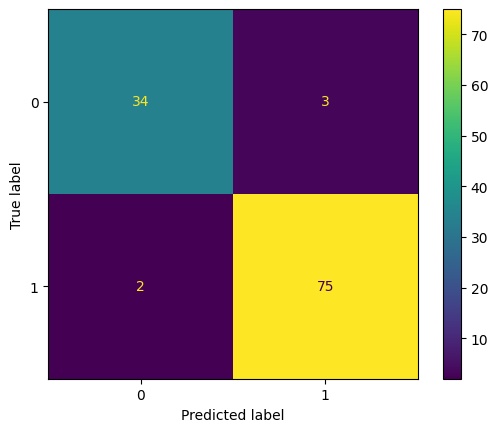

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.956140350877193
Precision: 0.9615384615384616
Recall: 0.974025974025974


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances

AttributeError: 'numpy.ndarray' object has no attribute 'columns'